### 빅쿼리 연동해서 EDA

In [2]:
#bigquery 연동하기 
from google.oauth2 import service_account
from google.cloud import bigquery

In [3]:
credentials = service_account.Credentials.from_service_account_file("./data/team-project.json")

FileNotFoundError: [Errno 2] No such file or directory: './data/team-project.json'

In [38]:
credentials

In [39]:
client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id
)

In [40]:
client

In [41]:
# 카카오_네이버_구글 병합자료
sql= """
WITH KNG_same_columns_combined AS (
  SELECT 
    platform,
    store_name,
    review_text,
    classification_result
  FROM `team-project-432503.review_data.kakao_review_final` AS KRF
  
  UNION ALL
  
  SELECT 
    platform,
    store_name,
    review_text,
    classification_result
  FROM `team-project-432503.review_data.google_hongkong_reviews_final` AS GRF

  UNION ALL

  SELECT 
    platform,
    store_name,
    review_text,
    classification_result
  FROM `team-project-432503.review_data.naver_review_final` AS NRF

)
SELECT 
    platform,
    store_name,
    review_text,
    classification_result
FROM KNG_same_columns_combined
GROUP BY
    platform,
    store_name,
    review_text,
    classification_result
"""

In [42]:
KNG_same_columns_combined_df = client.query(sql).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [43]:
KNG_same_columns_combined_df.loc[KNG_same_columns_combined_df['store_name'] == '홍콩반점0410 가산디지털단지 역점', 'store_name'] = '홍콩반점0410 가산디지털단지역점'

In [44]:
KNG_same_columns_combined_df.loc[KNG_same_columns_combined_df['store_name'] == '홍콩반점0410 양천구청점점', 'store_name'] = '홍콩반점0410 양천구청점'

In [45]:
KNG_same_columns_combined_df.loc[KNG_same_columns_combined_df['store_name'] == '홍콩반점0410 목동 파리공원점', 'store_name'] = '홍콩반점0410 목동파리공원점'

In [46]:
KNG_same_columns_combined_df.loc[KNG_same_columns_combined_df['store_name'] == '홍콩반점0410 문배지점', 'store_name'] = '홍콩반점0410 용산문배점'

In [47]:
KNG_same_columns_combined_df["store_name"] = KNG_same_columns_combined_df["store_name"].str.replace("홍콩반점0410 ", "", regex=False)

In [48]:
KNG_same_columns_combined_df['store_name'].nunique()

90

In [49]:
# 유니크한 store_name 값을 가져옴
unique_store_names = KNG_same_columns_combined_df['store_name'].unique()

# 유니크한 값들을 ㄱㄴㄷ 순으로 정렬
sorted_unique_store_names = sorted(unique_store_names)

In [50]:
# 카카오_구글_별점 병합자료
sql= """
WITH KG_user_star_combined AS (
  SELECT 
    platform,
    store_name,
    review_text,
    user_star,
    classification_result
  FROM `team-project-432503.review_data.kakao_review_final` AS KRF
  
  UNION ALL
  
  SELECT 
    platform,
    store_name,
    review_text,
    user_star,
    classification_result
  FROM `team-project-432503.review_data.google_hongkong_reviews_final` AS GRF
)
SELECT 
    platform,
    store_name,
    review_text,
    user_star,
    classification_result
FROM KG_user_star_combined
GROUP BY
      platform,
    store_name,
    review_text,
    user_star,
    classification_result
"""

In [51]:
KG_user_star_combined_df = client.query(sql).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [52]:
KG_user_star_combined_df.loc[KG_user_star_combined_df['store_name'] == '홍콩반점0410 가산디지털단지 역점', 'store_name'] = '홍콩반점0410 가산디지털단지역점'

In [53]:
KG_user_star_combined_df.loc[KG_user_star_combined_df['store_name'] == '홍콩반점0410 양천구청점점', 'store_name'] = '홍콩반점0410 양천구청점'

In [54]:
KG_user_star_combined_df.loc[KG_user_star_combined_df['store_name'] == '홍콩반점0410 목동 파리공원점', 'store_name'] = '홍콩반점0410 목동파리공원점'

In [55]:
KG_user_star_combined_df.loc[KG_user_star_combined_df['store_name'] == '홍콩반점0410 문배지점', 'store_name'] = '홍콩반점0410 용산문배점'

In [56]:
pd.set_option('display.expand_frame_repr', False)  # 열이 화면 너비를 초과할 때 데이터프레임을 줄 바꿈하지 않도록 설정

In [57]:
# 카카오_네이버_별점 병합자료
sql= """
WITH KN_review_date_combined AS (
  SELECT 
    platform,
    store_name,
    review_text,
    review_date,
    classification_result
  FROM `team-project-432503.review_data.kakao_review_final` AS KRF
  
  UNION ALL
  
  SELECT 
    platform,
    store_name,
    review_text,
    review_date,
    classification_result
  FROM `team-project-432503.review_data.naver_review_final` AS NRF
)
SELECT 
    platform,
    store_name,
    review_text,
    review_date,
    classification_result
FROM KN_review_date_combined

WHERE
    review_date > DATE('2024-06-03')
    
GROUP BY
      platform,
    store_name,
    review_text,
    review_date,
    classification_result


    
"""

In [58]:
after_KN_review_date_combined = client.query(sql).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [59]:
after_KN_review_date_combined.loc[after_KN_review_date_combined['store_name'] == '홍콩반점0410 가산디지털단지 역점', 'store_name'] = '홍콩반점0410 가산디지털단지역점'

In [60]:
after_KN_review_date_combined.loc[after_KN_review_date_combined['store_name'] == '홍콩반점0410 양천구청점점', 'store_name'] = '홍콩반점0410 양천구청점'

In [61]:
after_KN_review_date_combined.loc[after_KN_review_date_combined['store_name'] == '홍콩반점0410 목동 파리공원점', 'store_name'] = '홍콩반점0410 목동파리공원점'

In [62]:
after_KN_review_date_combined.loc[after_KN_review_date_combined['store_name'] == '홍콩반점0410 문배지점', 'store_name'] = '홍콩반점0410 용산문배점'

In [63]:
after_KN_review_date_combined["store_name"] = after_KN_review_date_combined["store_name"].str.replace("홍콩반점0410 ", "", regex=False)

In [64]:
# 카카오_네이버_별점 병합자료
sql= """
WITH KN_review_date_combined AS (
  SELECT 
    platform,
    store_name,
    review_text,
    review_date,
    classification_result
  FROM `team-project-432503.review_data.kakao_review_final` AS KRF
  
  UNION ALL
  
  SELECT 
    platform,
    store_name,
    review_text,
    review_date,
    classification_result
  FROM `team-project-432503.review_data.naver_review_final` AS NRF
)
SELECT 
    platform,
    store_name,
    review_text,
    review_date,
    classification_result
FROM KN_review_date_combined

WHERE
    review_date < DATE('2024-06-03')
    
GROUP BY
      platform,
    store_name,
    review_text,
    review_date,
    classification_result    
"""

In [65]:
before_KN_review_date_combined = client.query(sql).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [66]:
before_KN_review_date_combined.loc[before_KN_review_date_combined['store_name'] == '홍콩반점0410 가산디지털단지 역점', 'store_name'] = '홍콩반점0410 가산디지털단지역점'

In [67]:
before_KN_review_date_combined.loc[before_KN_review_date_combined['store_name'] == '홍콩반점0410 양천구청점점', 'store_name'] = '홍콩반점0410 양천구청점'

In [68]:
before_KN_review_date_combined.loc[before_KN_review_date_combined['store_name'] == '홍콩반점0410 목동 파리공원점', 'store_name'] = '홍콩반점0410 목동파리공원점'

In [69]:
before_KN_review_date_combined.loc[before_KN_review_date_combined['store_name'] == '홍콩반점0410 문배지점', 'store_name'] = '홍콩반점0410 용산문배점'

In [70]:
before_KN_review_date_combined["store_name"] = before_KN_review_date_combined["store_name"].str.replace("홍콩반점0410 ", "", regex=False)

<Axes: xlabel='count', ylabel='store_name'>

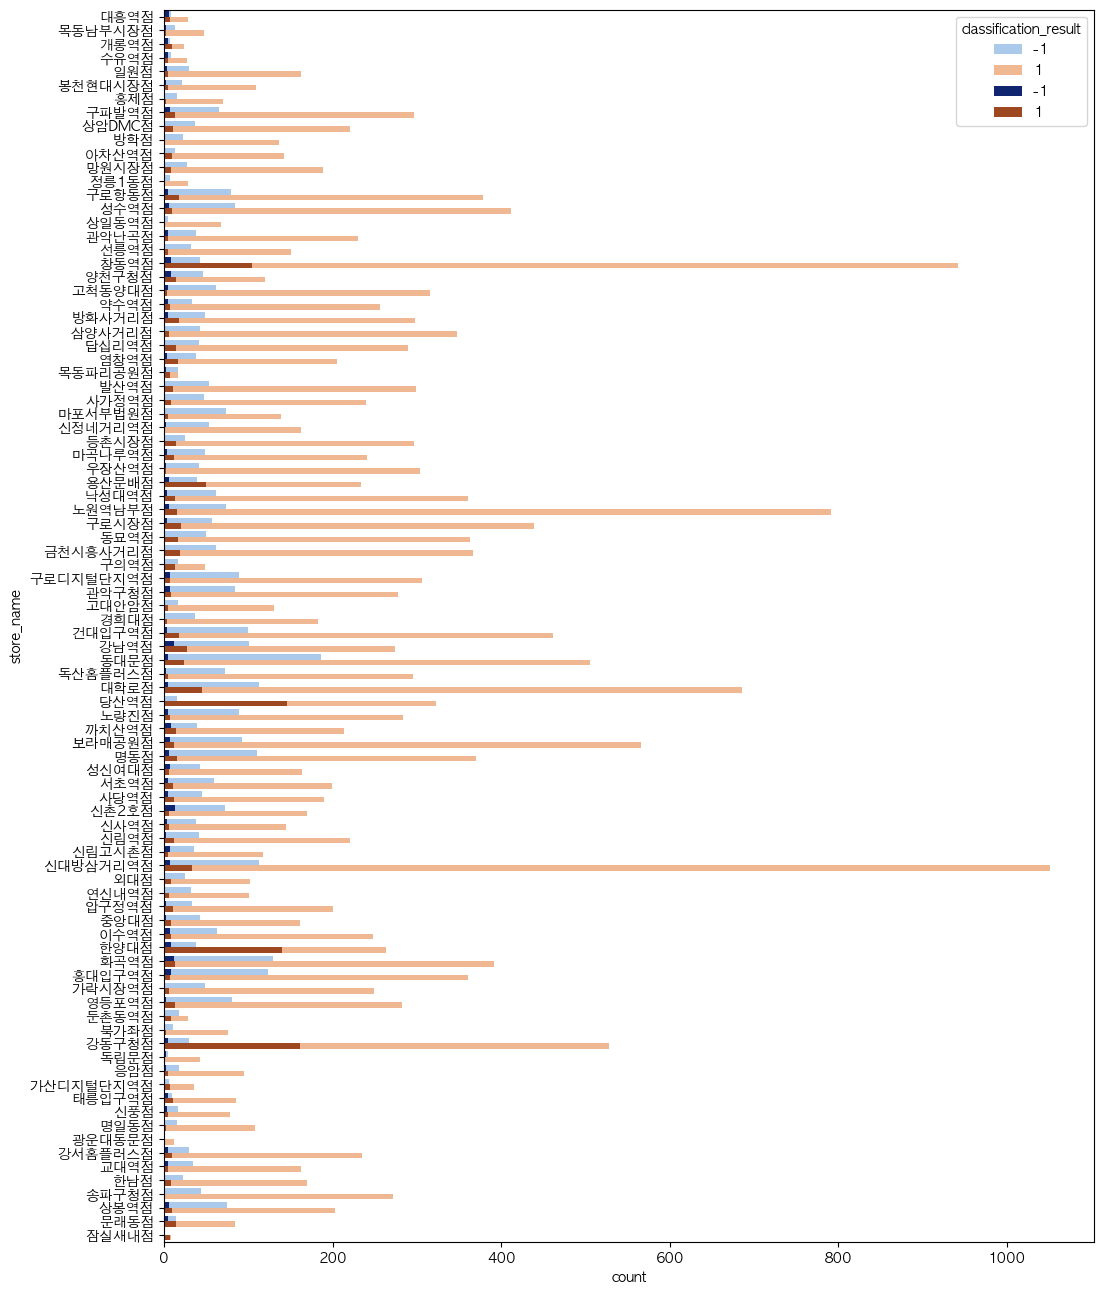

In [71]:
#별점 별 감정분포
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize=(12, 16))
sns.countplot(
    y = "store_name",
    palette = "pastel",
    hue = "classification_result",
    data = before_KN_review_date_combined
)

sns.countplot(
    y = "store_name",
    palette = "dark",
    hue = "classification_result",
    data = after_KN_review_date_combined
)

In [38]:
# 예시 데이터프레임 생성 (실제 데이터로 대체해야 함)
before_data = before_KN_review_date_combined
after_data = after_KN_review_date_combined

# 각 가게별, 감정별 빈도 계산
before_counts = before_data.groupby(['store_name', 'classification_result']).size().unstack(fill_value=0)
after_counts = after_data.groupby(['store_name', 'classification_result']).size().unstack(fill_value=0)

/var/folders/ly/7phrswwd4gzcgyt5t5p35nqw0000gn/T/ipykernel_14377/1989105675.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=change_positive_ratio.values, y=change_positive_ratio.index, palette="coolwarm")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


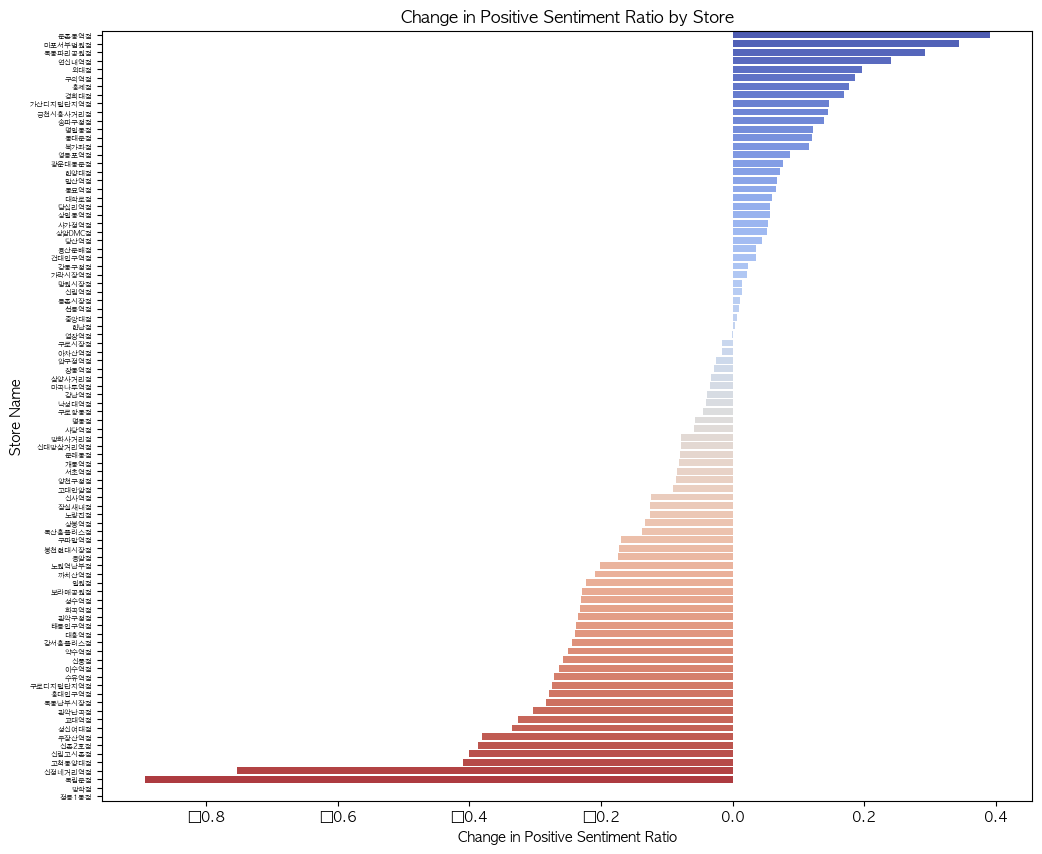

발전된 가게 (상위 5개):
store_name
둔촌동역점      0.391304
마포서부법원점    0.344340
목동파리공원점    0.292929
연신내역점      0.240602
외대점        0.196850
Name: positive_ratio, dtype: float64

지지부진한 가게 (하위 5개):
store_name
대흥역점        -0.239316
강서홈플러스점     -0.243935
약수역점        -0.249450
신풍점         -0.258359
이수역점        -0.264094
수유역점        -0.271429
구로디지털단지역점   -0.274684
홍대입구역점      -0.278675
목동남부시장점     -0.283333
관악난곡점       -0.302653
교대역점        -0.326531
성신여대점       -0.334578
우장산역점       -0.381159
신촌2호점       -0.386690
신림고시촌점      -0.401070
고척동양대점      -0.409625
신정네거리역점     -0.753488
독립문점        -0.893617
방학점               NaN
정릉1동점             NaN
Name: positive_ratio, dtype: float64


In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




before_counts['sentiment_total'] = before_counts[-1] + before_counts[1]
after_counts['sentiment_total'] = after_counts[-1] + after_counts[1]

before_counts['positive_ratio'] = before_counts[1] / before_counts['sentiment_total']
before_counts['negative_ratio'] = before_counts[-1] / before_counts['sentiment_total']

after_counts['positive_ratio'] = after_counts[1] / after_counts['sentiment_total']
after_counts['negative_ratio'] = after_counts[-1] / after_counts['sentiment_total']

# Positive 감정 변화량 계산
change_positive_ratio =  after_counts['positive_ratio']-before_counts['positive_ratio']
change_negative_ratio =  after_counts['negative_ratio']-before_counts['negative_ratio']

# 긍정감정 변화량 계산, 0에가까울수록 기존과 비슷, 음수일 수록 전보다 안좋은 것.
change_positive_ratio = change_positive_ratio.sort_values(ascending=False) # 변화량이 큰 순서로 정렬

#변화량 시각화
plt.figure(figsize=(12, 10))
sns.barplot(x=change_positive_ratio.values, y=change_positive_ratio.index, palette="coolwarm")
plt.yticks(fontsize=5)
plt.title('Change in Positive Sentiment Ratio by Store')
plt.xlabel('Change in Positive Sentiment Ratio')
plt.ylabel('Store Name')
plt.show()

# 변화량이 가장 큰 상위 3개 가게와 가장 적은 하위 3개 가게 출력
print("발전된 가게 (상위 5개):")
print(change_positive_ratio.head(5))

print("\n지지부진한 가게 (하위 5개):")
print(change_positive_ratio.tail(20))

In [40]:
after_data[(after_data['store_name'] == '약수점')]

,platform,store_name,review_text,review_date,classification_result


In [41]:
bad_store_name = ['신촌2호점',
                  '우장산역점',
                  '성신여대점',
                  '교대역점',
                  '관악난곡점',
                  '목동남부시장점',
                  '홍대입구역점',
                  '구로디지털단지역점',
                  '수유역점',
                  '이수역점',
                  '신풍점',
                  '약수점',
                  '대흥역점',
                  '강서홈플러스점']

for store in bad_store_name:
    store_data = after_data[(after_data['store_name'] == store)]
    store_data.to_csv(f'./data/{store}.csv', encoding="utf-8", index=False)
    print(f"CSV 파일 저장 완료: {store}.csv")
                  

CSV 파일 저장 완료: 신촌2호점.csv
CSV 파일 저장 완료: 우장산역점.csv
CSV 파일 저장 완료: 성신여대점.csv
CSV 파일 저장 완료: 교대역점.csv
CSV 파일 저장 완료: 관악난곡점.csv
CSV 파일 저장 완료: 목동남부시장점.csv
CSV 파일 저장 완료: 홍대입구역점.csv
CSV 파일 저장 완료: 구로디지털단지역점.csv
CSV 파일 저장 완료: 수유역점.csv
CSV 파일 저장 완료: 이수역점.csv
CSV 파일 저장 완료: 신풍점.csv
CSV 파일 저장 완료: 약수점.csv
CSV 파일 저장 완료: 대흥역점.csv
CSV 파일 저장 완료: 강서홈플러스점.csv


### 시각화

<Axes: xlabel='user_star', ylabel='count'>

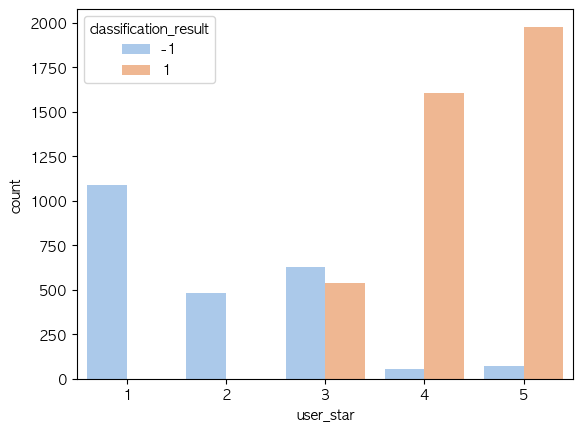

In [107]:
#별점 별 감정분포
import matplotlib as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'
sns.countplot(
    x = "user_star",
    palette = "pastel",
    hue = "classification_result",
    data = KG_user_star_combined_df
)

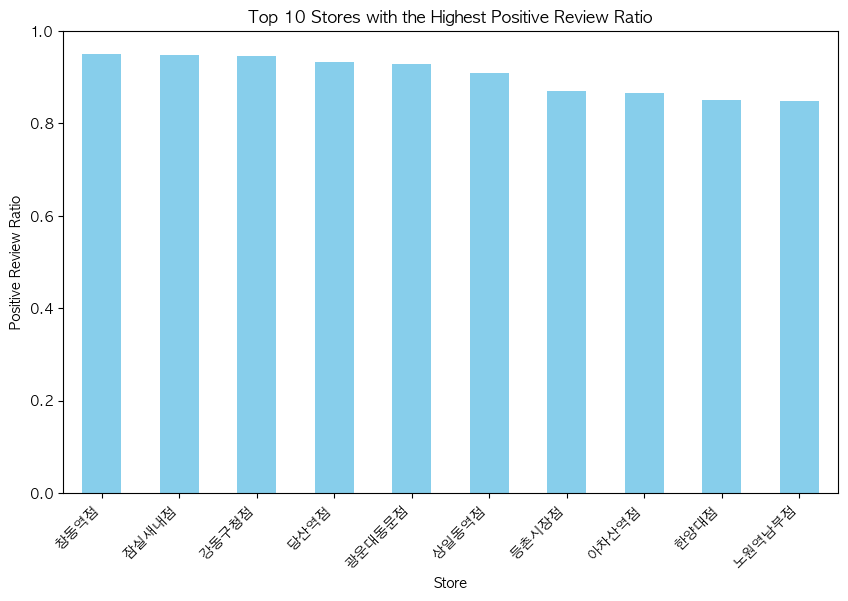

In [205]:
import matplotlib.pyplot as plt

# 매장별 리뷰 카운트
total_reviews = KNG_same_columns_combined_df.groupby('store_name').size()

# 매장별 긍정 리뷰 카운트
positive_reviews = KNG_same_columns_combined_df[KNG_same_columns_combined_df['classification_result'] == 1].groupby('store_name').size()

# 리뷰 건수 대비 긍정 리뷰 비율 계산
positive_ratio = (positive_reviews / total_reviews).fillna(0)

# 상위 10개 매장만 선택
top_10_positive_ratio = positive_ratio.sort_values(ascending=False).head(10)
top_10_positive_reviews = positive_reviews.loc[top_10_positive_ratio.index]

# 그래프 그리기
plt.figure(figsize=(10, 6))
bars = top_10_positive_ratio.plot(kind='bar', color='skyblue')

# x축 레이블을 45도 회전
plt.xticks(rotation=45,ha='right')

# 그래프 제목 및 축 레이블 설정
plt.title('Top 10 Stores with the Highest Positive Review Ratio')
plt.xlabel('Store')
plt.ylabel('Positive Review Ratio')

# y축 범위 설정 (0에서 1까지)
plt.ylim(0, 1)

# 그래프 출력
plt.show()

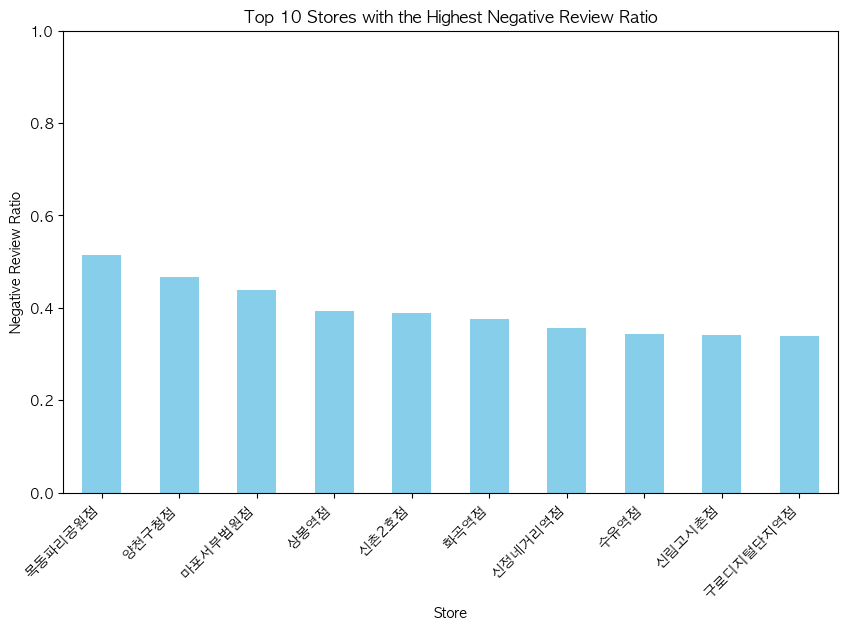

In [204]:
import matplotlib.pyplot as plt

# 매장별 리뷰 카운트
total_reviews = KNG_same_columns_combined_df.groupby('store_name').size()

# 매장별 부정 리뷰 카운트
negative_reviews = KNG_same_columns_combined_df[KNG_same_columns_combined_df['classification_result'] == -1].groupby('store_name').size()

# 리뷰 건수 대비 긍정 리뷰 비율 계산
negative_ratio = (negative_reviews / total_reviews).fillna(0)

# 상위 10개 매장만 선택
top_10_negative_ratio = negative_ratio.sort_values(ascending=False).head(10)
top_10_negative_reviews = negative_reviews.loc[top_10_negative_ratio.index]

# 그래프 그리기
plt.figure(figsize=(10, 6))
bars = top_10_negative_ratio.plot(kind='bar', color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Stores with the Highest Negative Review Ratio')
plt.xlabel('Store')
plt.ylabel('Negative Review Ratio')

# y축 범위 설정 (0에서 1까지)
plt.ylim(0, 1)


# 그래프 출력
plt.show()

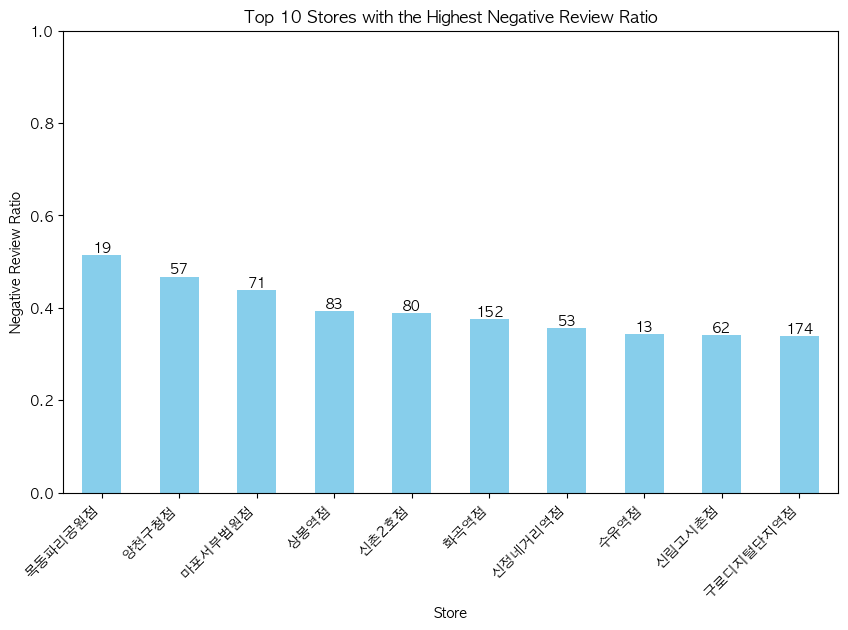

In [131]:
import matplotlib.pyplot as plt

# 매장별 리뷰 카운트
total_reviews = KNG_same_columns_combined_df.groupby('store_name').size()

# 매장별 부정 리뷰 카운트
negative_reviews = KNG_same_columns_combined_df[KNG_same_columns_combined_df['classification_result'] == -1].groupby('store_name').size()

# 리뷰 건수 대비 부정 리뷰 비율 계산
negative_ratio = (negative_reviews / total_reviews).fillna(0)

# 상위 10개 매장만 선택
top_10_negative_ratio = negative_ratio.sort_values(ascending=False).head(10)
top_10_negative_reviews = negative_reviews.loc[top_10_negative_ratio.index]

# 그래프 그리기
plt.figure(figsize=(10, 6))
bars = top_10_negative_ratio.plot(kind='bar', color='skyblue')

# 막대 위에 텍스트 추가 (부정 리뷰 수 표시)
for idx, bar in enumerate(bars.patches):
    height = bar.get_height()  # 막대의 높이 (비율)
    review_count = top_10_negative_reviews.iloc[idx]  # 해당 매장의 부정 리뷰 수
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{review_count}', 
             ha='center', va='bottom', fontsize=10, color='black')

# 그래프 제목 및 축 레이블 설정
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Stores with the Highest Negative Review Ratio')
plt.xlabel('Store')
plt.ylabel('Negative Review Ratio')

# y축 범위 설정 (0에서 1까지)
plt.ylim(0, 1)

# 그래프 출력
plt.show()